## Lasso

LASSO是由1996年Robert Tibshirani首次提出，全称Least absolute shrinkage and selection operator。该方法是一种压缩估计。它通过构造一个惩罚函数得到一个较为精炼的模型，使得它压缩一些系数，同时设定一些系数为零。因此保留了子集收缩的优点，是一种处理具有复共线性数据的有偏估计。

Lasso是一个估计稀疏系数的线性模型。它在某些情况下是有用的，因为它倾向于使用较少参数值来解决问题，有效的减少了给定解决方案所依赖的变量的数量。因此，Lasso及其变体是压缩传感领域的基础。在一定条件下，他可以恢复出精确的非零权值集。
数学上，Lasso由一个线性模型以L1先验作为正则化器训练而成。用于最小化的目标方程如下：
【插入图片】

Lasso添加了𝛼||𝑤||1作为解决最小化平方差的罚函数，a是一个常量，||w||1是参数向量的L1范数（也就是各个元素绝对值之和）
L2范数：向量各个元素的平方和，然后求平方根。

Lasso中使用坐标下降法作为系数拟合的算法。



In [1]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2]:
reg.predict([[1, 1]])

array([ 0.8])

对于较低级别的任务同样有用的是函数lasso_path，它沿着可能值的完整路径计算系数。

## Example，Lasso and Elastic Net for Sparse Signals

在人工生成的稀疏信号上估计Lasso和Elastic-Net回归模型，该信号带有附加噪声。并将估计稀疏与实际情况进行比较。


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240498


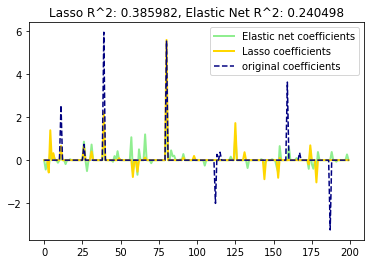

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 生成一些用于处理的稀疏数据
np.random.seed(42)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 # 稀疏化的系数
y = np.dot(X, coef)
# 添加一些噪声
y += 0.01 * np.random.normal(size=n_samples)
# 分割数据
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# Lasso
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# ElasticNet
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)


plt.plot(enet.coef_, color='lightgreen', linewidth=2,
label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
% (r2_score_lasso, r2_score_enet))
plt.show()

## Example：Compressive sensing: tomography reconstruction with L1 prior (Lasso)

压缩感知：L1先验的层析重建
该例子显示了从一组不同角度获取的平行投影重建图像。这种数据集是在Computed Tomography（CT）中获取的。
在没有关于样本的任何先验信息的情况下，重建图像所需的投影数为图像的线性大小1的顺序（以像素为单位）。为了简单起见，我们在这里考虑一个稀疏图像，其中只有对象边界上的像素有一个非零值。例如，这种数据可以与细胞材料相对应。但是，请注意大多数图像在不同的基础上是系数的，例如Haar小波？？？仅获取了1/7的投影，有必要使用样本上的现有信息（稀疏性）：这是压缩感知的一个例子。
图像层析投影操作是一种线性转换。除了对应于线性回归的数据保真度项外，我们还对图像的L1范数进行了惩罚，考虑到稀疏性。这样操作得到的优化就称为Lasso。我们利用sklearn.linear_model.Lasso类，使用了坐标下降算法。比较重要的是，在一个稀疏矩阵上进行的计算要比这里使用的投影操作更加有效率。
L1惩罚重建的结果误差为0（所有像素都被成功标记为0或1），即便在投影中增加了噪声。相比较而言，使用L2惩罚（Ridge）会为像素产生大量的标记错误。与L1惩罚相反，在重建图像上会观察到重要的伪影。特别要注意的是，在角上分割像素的圆形伪影导致的投影要比中央盘少。



c:\py35\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


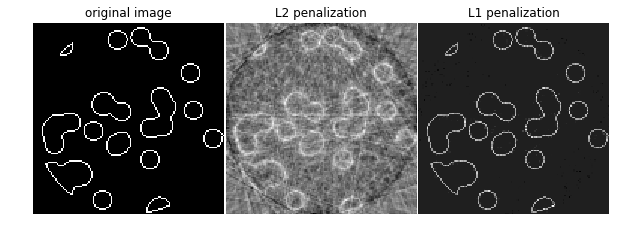

In [4]:
import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

def _weights(x, dx=1, orig=0):
	x = np.ravel(x)
	floor_x = np.floor((x - orig) / dx)
	alpha = (x - orig - floor_x * dx) / dx
	return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))
def _generate_center_coordinates(l_x):
	X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
	center = l_x / 2.
	X += 0.5 - center
	Y += 0.5 - center
	return X, Y


def build_projection_operator(l_x, n_dir):
	""" Compute the tomography design matrix.
	Parameters
	----------
	l_x : int
	linear size of image array
	n_dir : int
	number of angles at which projections are acquired.
	Returns
	-------
	p : sparse matrix of shape (n_dir l_x, l_x**2)
	"""
	X, Y = _generate_center_coordinates(l_x)
	angles = np.linspace(0, np.pi, n_dir, endpoint=False)
	data_inds, weights, camera_inds = [], [], []
	data_unravel_indices = np.arange(l_x ** 2)
	data_unravel_indices = np.hstack((data_unravel_indices,	data_unravel_indices))
	for i, angle in enumerate(angles):
		Xrot = np.cos(angle) * X - np.sin(angle) * Y
		inds, w = _weights(Xrot, dx=1, orig=X.min())
		mask = np.logical_and(inds >= 0, inds < l_x)
		weights += list(w[mask])
		camera_inds += list(inds[mask] + i * l_x)
		data_inds += list(data_unravel_indices[mask])
	proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
	return proj_operator

def generate_synthetic_data():
	""" Synthetic binary data """
	rs = np.random.RandomState(0)
	n_pts = 36
	x, y = np.ogrid[0:l, 0:l]
	mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
	mask = np.zeros((l, l))
	points = l * rs.rand(2, n_pts)
	mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
	mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
	res = np.logical_and(mask > mask.mean(), mask_outer)
	return np.logical_xor(res, ndimage.binary_erosion(res))

# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l / 7.)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)
# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)
plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')
plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,right=1)
plt.show()

## Setting regularization parameter，设置正则化参数

alpha参数控制预测稀疏的稀疏程度。

### Using cross-validation
在scikit-learn中，LassoCV和LassoLarsCV都可以通过交叉验证的方法设置alpha参数。
LassoLarsCV基于Least Angle Regression算法：
对于具有许多共线回归器的高维数据集，LassoCV通常是优选的。但是LassoLarsCV具有探索更多相关a参数值得优点，并且如果样本数量与特征数量相比非常小，则通常要比LassoCV更快。

### Information-criteria based model selection
另外，估计其LassoLarsIC建议使用Akaike信息标准AIC和Bayes信息标准BIC。当使用K-fold交叉验证时，并且正则化路径只计算一次而不是K+1次时，这是寻找a最优值的一种计算成本较低的方法。而然，这种标准需要对解的自由度进行适当的估计，对于大量样本并且假定模型是正确的，即数据实际上是由该模型生成的。当问题条件不好时，他们也会崩溃，比如当特征数多于样本数。

### Comparison with the regularization parameter of SVM
alpha和SVM中的正则参数C的等价性由a=1/C或者a=1/(n_samples*C)得出，取决于通过模型优化后的预测器和精确的目标函数。